In [1]:
import sys
import os

import pickle
import matplotlib.pyplot as plt
import numpy as np
import numpy.linalg as la
from functions_parameters.universal_parameters import a, b
from itertools import product

In [2]:
final_result = np.load('schf_filling_0p8_t_4_em4_random_basis_mesh_30_2_2.npz')


final_ground_state_e_diff_density = final_result['gse']
final_density = final_result['d']
final_bond = final_result['bond']
final_e_difference = final_result['e_diff']
final_c_difference = final_result['c_diff']
final_e_fermi = final_result['e_fermi']
final_iteration = final_result['iters']
any_bi_fail = final_result['any_bi_fail']

u_arr = final_result['u']
v1_arr = u_arr
u_mesh, v1_mesh = np.meshgrid(u_arr, v1_arr, indexing = 'ij')

In [3]:
np.max(final_c_difference)

np.float64(0.2487254689016784)

In [4]:
np.max(final_e_difference)

np.float64(6.228658745843774e-05)

In [5]:
np.all(np.logical_not(any_bi_fail))

np.True_

### Some points do not converge

In [6]:
index_c_diff = np.where(np.abs(final_c_difference)>1E-4)
final_ground_state_e_diff_density[index_c_diff] = 0
index_e_diff = np.where(np.abs(final_e_difference)>1E-4)
final_ground_state_e_diff_density[index_e_diff] = 0

In [7]:
index_c_diff

(array([ 1,  2,  2,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,
         6,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  8,  8,  9,  9,
         9,  9,  9,  9,  9,  9,  9, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11,
        11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12,
        12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13,
        13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15,
        15, 15, 15, 15, 15, 15, 15, 15, 15, 15]),
 array([ 6,  8,  9,  0,  0,  0,  0,  0,  0,  5,  8,  0,  0,  0,  0,  0,  0,
         9,  0,  0,  0,  0,  0,  0,  9,  0,  0,  0,  0,  0,  0,  8,  0,  0,
         0,  0,  0,  0,  8,  8, 13,  0,  0,  0,  0,  0,  0,  8,  8,  0,  0,
         0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  8,  0,  0,  0,  0,  0,  0,
         1,  1,  1,  1,  1,  1,  8,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,
         1,  1,  8,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  0,  0,
         0,  0,  0,  0,  1,  1,  1,  1

In [8]:
final_c_difference[index_c_diff]

array([2.74672474e-03, 9.75054707e-04, 1.23727645e-04, 1.28025935e-02,
       1.28025934e-02, 1.80877457e-02, 1.80877462e-02, 1.80877462e-02,
       1.80877462e-02, 6.15164209e-04, 1.16819520e-04, 4.49776075e-02,
       4.49776075e-02, 4.49776075e-02, 4.49776075e-02, 4.49776075e-02,
       4.49776075e-02, 4.35180159e-04, 7.50054686e-02, 7.50054686e-02,
       7.50054686e-02, 7.50054686e-02, 7.50054686e-02, 7.50054686e-02,
       5.16559830e-04, 1.09952978e-01, 1.09952978e-01, 1.09952978e-01,
       1.09952978e-01, 1.09952978e-01, 1.09952978e-01, 2.98099462e-04,
       1.42966533e-01, 1.42966533e-01, 1.42966533e-01, 1.42966533e-01,
       1.42966533e-01, 1.42966533e-01, 3.08930399e-04, 3.88187004e-04,
       4.55117696e-04, 1.77505859e-01, 1.77505859e-01, 1.77505859e-01,
       1.77505859e-01, 1.77505859e-01, 1.77505859e-01, 3.91653275e-04,
       1.99807887e-04, 2.10401490e-01, 2.10401490e-01, 2.10401490e-01,
       2.10401490e-01, 2.10401490e-01, 2.10401490e-01, 2.12288414e-02,
      

### Phase Analysis

In [9]:
from functions_parameters.tools import rot_symm_m_check_d, translation_check_d, translation_check_d_updated
from functions_parameters.universal_parameters import pauli_matrices

translation_a1 = np.kron(np.array([[0,0,1,0],
                           [0,0,0,1],
                           [1,0,0,0],
                           [0,1,0,0]]), np.eye(3))
translation_a2 = np.kron(np.array([[0,1,0,0],
                           [1,0,0,0],
                           [0,0,0,1],
                           [0,0,1,0]]), np.eye(3))
# we can have further translational symmetry definition, which is a C6 rotation away
translation_a3 = translation_a1 @ translation_a2
c_6_uc = np.array([[0,0,1],
                   [1,0,0],
                   [0,1,0]])
c_3_uc = c_6_uc@c_6_uc
c_2_uc = c_6_uc @ c_3_uc
c_6_2uc = np.zeros((12, 12))
c_6_2uc[0, 2] = 1
c_6_2uc[1, 6] = 1
c_6_2uc[2, 7] = 1
c_6_2uc[3, 8] = 1
c_6_2uc[4, 0] = 1
c_6_2uc[5, 1] = 1
c_6_2uc[6, -1] = 1
c_6_2uc[7, 3] = 1
c_6_2uc[8, 4] = 1
c_6_2uc[9, 5] = 1
c_6_2uc[10, -3] = 1
c_6_2uc[11, -2] = 1

c_6_2uc = np.moveaxis(np.reshape(c_6_2uc, (2, 2, 3, 2, 2, 3)), (0, 3), (1, 4)).reshape(12, 12)
c_3_2uc = c_6_2uc @ c_6_2uc
c_2_2uc = c_3_2uc @ c_6_2uc

In [10]:
from functions_parameters.tools import array_print

In [12]:
# try define a translated rotation symmetry check operator such that we can check if the phase is genuine stripe orders.
c_6_2uc_gamma = np.zeros((12, 12))
c_6_2uc_gamma[1, 0] = 1
c_6_2uc_gamma[2, 1] = 1
c_6_2uc_gamma[6, 2] = 1
c_6_2uc_gamma[7, 3] = 1
c_6_2uc_gamma[8, 4] = 1
c_6_2uc_gamma[0, 5] = 1
c_6_2uc_gamma[10, 6] = 1
c_6_2uc_gamma[11, 7] = 1
c_6_2uc_gamma[3, 8] = 1
c_6_2uc_gamma[4, 9] = 1
c_6_2uc_gamma[5, 10] = 1
c_6_2uc_gamma[9, 11] = 1
array_print(c_6_2uc_gamma)

Array = [
     0    ,      0    ,      0    ,      0    ,      0    ,  1.000E+00,      0    ,      0    ,      0    ,      0    ,      0    ,      0    , 
 1.000E+00,      0    ,      0    ,      0    ,      0    ,      0    ,      0    ,      0    ,      0    ,      0    ,      0    ,      0    , 
     0    ,  1.000E+00,      0    ,      0    ,      0    ,      0    ,      0    ,      0    ,      0    ,      0    ,      0    ,      0    , 
     0    ,      0    ,      0    ,      0    ,      0    ,      0    ,      0    ,      0    ,  1.000E+00,      0    ,      0    ,      0    , 
     0    ,      0    ,      0    ,      0    ,      0    ,      0    ,      0    ,      0    ,      0    ,  1.000E+00,      0    ,      0    , 
     0    ,      0    ,      0    ,      0    ,      0    ,      0    ,      0    ,      0    ,      0    ,      0    ,  1.000E+00,      0    , 
     0    ,      0    ,  1.000E+00,      0    ,      0    ,      0    ,      0    ,      0    ,      0    ,      0    , 

In [ ]:
sorted_density[5, -5, 0]

array([[0.16689688+9.91869042e-28j, 0.30302073-1.68542737e-19j,
        0.02905056-3.00086044e-20j],
       [0.16761495-5.04077348e-27j, 0.30409342-3.10125071e-20j,
        0.02932346-3.77361655e-21j]])

In [ ]:
sorted_density[5, -5, 0]

array([[0.16689688+9.91869042e-28j, 0.30302073-1.68542737e-19j,
        0.02905056-3.00086044e-20j],
       [0.16761495-5.04077348e-27j, 0.30409342-3.10125071e-20j,
        0.02932346-3.77361655e-21j]])

In [ ]:
sorted_density[5, -5, 0]

array([[0.16689688+9.91869042e-28j, 0.30302073-1.68542737e-19j,
        0.02905056-3.00086044e-20j],
       [0.16761495-5.04077348e-27j, 0.30409342-3.10125071e-20j,
        0.02932346-3.77361655e-21j]])

In [ ]:
sorted_density[5, -5, 0]

array([[0.16689688+9.91869042e-28j, 0.30302073-1.68542737e-19j,
        0.02905056-3.00086044e-20j],
       [0.16761495-5.04077348e-27j, 0.30409342-3.10125071e-20j,
        0.02932346-3.77361655e-21j]])

In [ ]:
sorted_density[5, -5, 0]

array([[0.16689688+9.91869042e-28j, 0.30302073-1.68542737e-19j,
        0.02905056-3.00086044e-20j],
       [0.16761495-5.04077348e-27j, 0.30409342-3.10125071e-20j,
        0.02932346-3.77361655e-21j]])

In [ ]:
sorted_density[5, -5, 0]

array([[0.16689688+9.91869042e-28j, 0.30302073-1.68542737e-19j,
        0.02905056-3.00086044e-20j],
       [0.16761495-5.04077348e-27j, 0.30409342-3.10125071e-20j,
        0.02932346-3.77361655e-21j]])

In [13]:
la.norm(np.roll(c_6_2uc, 6, axis=0)-c_6_2uc_gamma)

np.float64(0.0)

In [14]:
c_6_2uc_y=np.zeros((12, 12))
c_6_2uc_y[10, 0] = 1
c_6_2uc_y[11, 1] = 1
c_6_2uc_y[3, 2] = 1
c_6_2uc_y[4, 3] = 1
c_6_2uc_y[5, 4] = 1
c_6_2uc_y[9, 5] = 1
c_6_2uc_y[1, 6] = 1
c_6_2uc_y[2, 7] = 1
c_6_2uc_y[6, 8] = 1
c_6_2uc_y[7, 9] = 1
c_6_2uc_y[8, 10] = 1
c_6_2uc_y[0, 11] = 1

In [15]:
c_6_2uc_y

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [16]:
c_6_2uc_x=np.zeros((12, 12))
c_6_2uc_x[4, 0] = 1
c_6_2uc_x[5, 1] = 1
c_6_2uc_x[9, 2] = 1
c_6_2uc_x[10, 3] = 1
c_6_2uc_x[11, 4] = 1
c_6_2uc_x[3, 5] = 1
c_6_2uc_x[7, 6] = 1
c_6_2uc_x[8, 7] = 1
c_6_2uc_x[0, 8] = 1
c_6_2uc_x[1, 9] = 1
c_6_2uc_x[2, 10] = 1
c_6_2uc_x[6, 11] = 1

In [17]:
c_3_2uc_gamma = c_6_2uc_gamma @ c_6_2uc_gamma
c_2_2uc_gamma = c_3_2uc_gamma @ c_6_2uc_gamma
c_3_2uc_x = c_6_2uc_x @ c_6_2uc_x
c_2_2uc_x = c_3_2uc_x @ c_6_2uc_x
c_3_2uc_y = c_6_2uc_y @ c_6_2uc_y
c_2_2uc_y = c_3_2uc_y @ c_6_2uc_y


In [20]:
# ts_charge_test_phase = ['', '1*2 CDW', '2*2 CDW']
# ts_m_test_phase = [' ', ' 1*2 SDW', ' 2*2 SDW']
ts_phase = ['', '1*2','2*2']
nematic_phase = [' R symmetric', ' C3 charge nematic', ' C2 charge nematic', ' no R']
Magnetism_phase = [' +', ' FM', ' Ferri', ' AFM']

phase_list_final = list(i+j+m for i,j,m in product(ts_phase, nematic_phase, Magnetism_phase))

In [21]:
sorted_ground_state_e_index = np.argsort(final_ground_state_e_diff_density, axis=2)
sorted_ground_state_e= np.take_along_axis(final_ground_state_e_diff_density, sorted_ground_state_e_index, axis=2)
sorted_density = np.take_along_axis(final_density, sorted_ground_state_e_index[:,:,:,np.newaxis,np.newaxis], axis=2)
sorted_e_difference = np.take_along_axis(final_e_difference, sorted_ground_state_e_index, axis=2)
sorted_c_difference = np.take_along_axis(final_c_difference, sorted_ground_state_e_index, axis=2)

In [23]:
phase_diagram_based_on_d = np.zeros((u_mesh.shape))

threshold = 1E-2
for i in range(u_mesh.shape[0]):
    for j in range(u_mesh.shape[1]):
        d_ij = sorted_density[i,j,0]
        # ts_recording_c = np.zeros((3))
        # ts_recording_s = np.zeros((3))
        ts_recording = np.zeros((3))
        rs_recording = np.zeros((4))
        m_recording = np.zeros((4))
        # translation_a1_diff_c, translation_a2_diff_c, translation_a1_diff_m, translation_a2_diff_m = translation_check_d(d_ij, translation_a1, translation_a2)
        # if translation_a1_diff_c<threshold and translation_a2_diff_c<threshold:
        #     ts_recording_c[0] = 1
        # elif translation_a1_diff_c>threshold and translation_a2_diff_c>threshold:
        #     ts_recording_c[-1] = 1
        # else:
        #     ts_recording_c[1] = 1
        # if translation_a1_diff_m<threshold and translation_a2_diff_m<threshold:
        #     ts_recording_s[0] = 1
        # elif translation_a1_diff_m>threshold and translation_a2_diff_m>threshold:
        #     ts_recording_s[-1] = 1
        # else:
        #     ts_recording_s[1] = 1
        ts_diff_arr = translation_check_d_updated(d_ij, translation_a1, translation_a2, translation_a3)
        if np.all(ts_diff_arr<threshold):
            ts_recording[0] = 1
        elif np.all(ts_diff_arr>threshold):
            ts_recording[-1] = 1
        else:
            ts_recording[1] = 1
        if ts_recording[0]<1.5:
            d_ij = d_ij[:,:3]
            c6_diff, c3_diff, c2_diff, magnetism_arr = rot_symm_m_check_d(d_ij, c_6_uc, c_3_uc, c_2_uc)
        else:
            c6_diff_o, c3_diff_o, c2_diff_o, magnetism_arr = rot_symm_m_check_d(d_ij, c_6_2uc, c_3_2uc, c_2_2uc)
            c6_diff_x, c3_diff_x, c2_diff_x, _ = rot_symm_m_check_d(d_ij, c_6_2uc_x, c_3_2uc_x, c_2_2uc_x)
            c6_diff_y, c3_diff_y, c2_diff_y, _ = rot_symm_m_check_d(d_ij, c_6_2uc_y, c_3_2uc_y, c_2_2uc_y)    
            c6_diff_gamma, c3_diff_gamma, c2_diff_gamma, _ = rot_symm_m_check_d(d_ij, c_6_2uc_gamma, c_3_2uc_gamma, c_2_2uc_gamma)
            c6_diff = np.min(np.abs(np.array([c6_diff, c6_diff_x, c6_diff_y, c6_diff_gamma])))
            c3_diff = np.min(np.abs(np.array([c3_diff, c3_diff_x, c3_diff_y, c3_diff_gamma])))
            c2_diff = np.min(np.abs(np.array([c2_diff, c2_diff_x, c2_diff_y, c2_diff_gamma])))
        if c6_diff<threshold:
            rs_recording[0] = 1
        elif c6_diff>threshold and c3_diff<threshold:
            rs_recording[1] = 1
        elif c2_diff<threshold and c6_diff>threshold:
            rs_recording[2] = 1
        else:
            rs_recording[3] = 1
        if np.max(np.abs(magnetism_arr)) > threshold:
            if np.all(np.sign(np.real(magnetism_arr)) == 1) or np.all(np.sign(np.real(magnetism_arr)) == -1):
                m_recording[1] = 1
            else:
                net_m = np.sum(np.real(magnetism_arr))
                if np.abs(net_m) <= threshold:
                    m_recording[3] = 1
                else:
                    m_recording[2] = 1
        else:
            m_recording[0] = 1
        phase_arr = np.kron(ts_recording,rs_recording)
        phase_arr = np.kron(phase_arr,m_recording)
        phase = np.where(phase_arr>0.5)[0][0]
        
        phase_diagram_based_on_d[i,j]=phase

Text(0.5, 1.0, 'filling = 0.8')

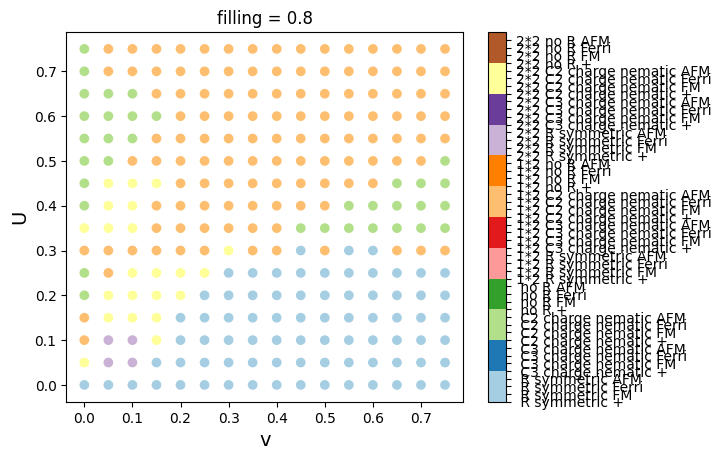

In [24]:
colorbar_ticks_combined = np.arange(len(phase_list_final))
cmap = plt.get_cmap("Paired", len(phase_list_final))
# plt.pcolormesh(e_fermi_mesh, u_mesh, phase_diagram_combined_op.T, cmap="Paired")
plt.scatter(u_mesh, v1_mesh, c=phase_diagram_based_on_d, cmap=cmap,vmin=0, vmax=len(phase_list_final))
# plt.xlabel(r'$E_{f}$', size = '14')
plt.xlabel('v', size = '14')
plt.ylabel('U', size = '14')
# plt.xlim(3.8,6)
colorbar_ticks = np.arange(len(phase_list_final))
cbar = plt.colorbar()
cbar.set_ticks(colorbar_ticks)
cbar.set_ticklabels(phase_list_final)
plt.title('filling = 0.8')

In [25]:
unique_phase_index = np.unique(phase_diagram_based_on_d)
unique_phase_name = [phase_list_final[i] for i in np.int_(unique_phase_index)]
filtered_phase_diagram = np.zeros(phase_diagram_based_on_d.shape)
for i in range(u_mesh.shape[0]):
    for j in range(u_mesh.shape[1]):
        filtered_phase_diagram[i,j] = np.where(unique_phase_index==phase_diagram_based_on_d[i,j])[0][0]

Text(0.5, 1.0, 'filling = 0.8')

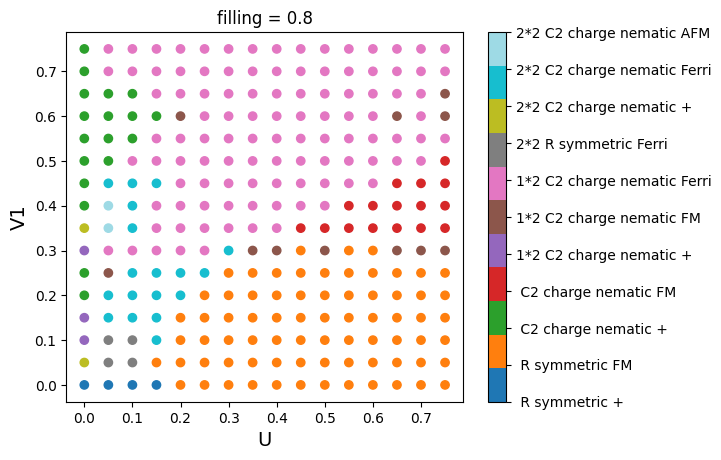

In [26]:
cmap = plt.get_cmap("tab20", len(unique_phase_index))
plt.scatter(u_mesh, v1_mesh, c=filtered_phase_diagram, cmap=cmap)
plt.xlabel('U', size = '14')
plt.ylabel('V1', size = '14')
colorbar_ticks = np.arange(len(unique_phase_index))
cbar = plt.colorbar()
cbar.set_ticks(np.arange(len(unique_phase_index)))
cbar.set_ticklabels(unique_phase_name)
plt.title('filling = 0.8')

Text(0.5, 1.0, 'filling = 0.8')

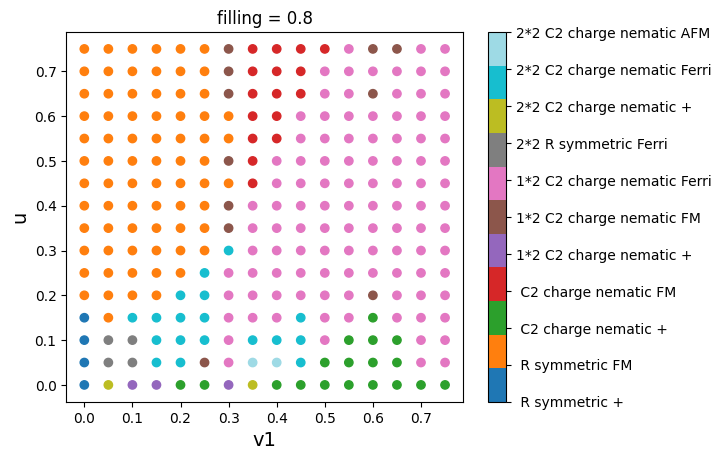

In [27]:
cmap = plt.get_cmap("tab20", len(unique_phase_index))
plt.scatter(v1_mesh, u_mesh, c=filtered_phase_diagram, cmap=cmap)
plt.xlabel('v1', size = '14')
plt.ylabel('u', size = '14')
colorbar_ticks = np.arange(len(unique_phase_index))
cbar = plt.colorbar()
cbar.set_ticks(np.arange(len(unique_phase_index)))
cbar.set_ticklabels(unique_phase_name)
plt.title('filling = 0.8')

In [28]:
sorted_density[2,6,0,0]+sorted_density[2,6,0,1]

array([0.30897701+3.06094518e-20j, 0.3948278 +2.36779113e-19j,
       0.09619519+3.34331305e-20j, 0.30897701+2.97912551e-20j,
       0.3948278 -1.97639817e-19j, 0.09619519+1.05198080e-20j,
       0.30897701+3.28278638e-20j, 0.3948278 +1.59485692e-20j,
       0.09619519-2.57536614e-20j, 0.30897701-7.07089993e-20j,
       0.3948278 +1.26801519e-20j, 0.09619519-4.52511161e-20j])

In [29]:
sorted_density[2,6,0,0]-sorted_density[2,6,0,1]

array([-1.69309011e-15+5.02262874e-20j,  2.45028353e-01+5.44568902e-20j,
        1.38777878e-17-3.01586572e-20j,  1.60982339e-15-1.04014621e-19j,
       -2.45028353e-01+3.23220775e-19j,  9.02056208e-17+7.06925165e-21j,
       -1.88737914e-15+2.11000619e-19j, -2.45028353e-01-4.32158874e-20j,
       -4.37150316e-16+2.00942495e-20j,  1.72084569e-15+1.12427017e-19j,
        2.45028353e-01+5.51045877e-20j, -1.38777878e-17+5.59333026e-20j])

In [30]:
sorted_density[3,6,0,0]+sorted_density[3,6,0,1]

array([0.28048633-2.76387359e-19j, 0.1202418 +3.83602896e-20j,
       0.39927186+5.79296982e-20j, 0.28048633+1.07712383e-19j,
       0.1202418 +5.11570648e-20j, 0.39927186+9.16166207e-20j,
       0.28048633-1.20785650e-19j, 0.1202418 +3.20662775e-21j,
       0.39927186-1.92463628e-19j, 0.28048633+4.01702378e-20j,
       0.1202418 +1.83537139e-20j, 0.39927186+5.03873018e-21j])

In [31]:
sorted_density[3,6,0,0]-sorted_density[3,6,0,1]

array([-5.55111512e-16+5.36379801e-20j, -7.14706072e-16-1.00606002e-20j,
        2.77328553e-01+4.68618729e-20j,  3.33066907e-16-2.90606446e-20j,
       -6.66133815e-16-1.95044614e-20j,  2.77328553e-01+2.62958342e-19j,
       -9.43689571e-16+2.58204243e-19j, -5.20417043e-16+1.43684117e-21j,
       -2.77328553e-01+1.27323219e-19j, -3.33066907e-16-1.27747079e-19j,
       -5.20417043e-16+3.56903479e-20j, -2.77328553e-01+2.51059294e-19j])

In [32]:
rot_symm_m_check_d(sorted_density[0,1,0], c_6_2uc_y, c_3_2uc_y, c_2_2uc_y) 

(np.float64(2.2975325885132847e-06),
 np.float64(2.297532588763085e-06),
 np.float64(4.4408947994252e-16),
 array([0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
        0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j]))

In [33]:
rot_symm_m_check_d(sorted_density[0,1,0], c_6_2uc, c_3_2uc, c_2_2uc) 

(np.float64(0.04322388903641705),
 np.float64(0.043223889036416635),
 np.float64(4.4408947994252e-16),
 array([0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
        0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j]))

In [34]:
sorted_density[0,1,0,0]-sorted_density[0,1,0,1]

array([0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j])

In [35]:
TB_index=np.where(filtered_phase_diagram>3)
simplified_phase_diagram = filtered_phase_diagram.copy()
simplified_phase_diagram[TB_index] = 4

simplified_phase_list = unique_phase_name[:4]+['TSB']

In [36]:
from matplotlib.colors import ListedColormap

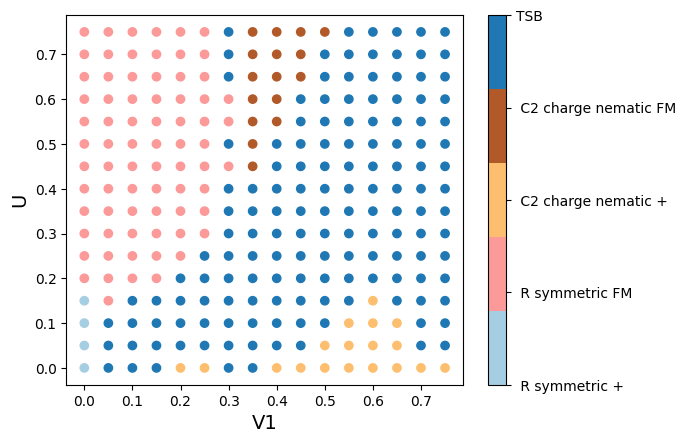

In [37]:
paired = plt.get_cmap("Paired").colors
corlor_index = [0,4,6,11,1]
color_list = [paired[i] for i in corlor_index]

cmap = ListedColormap(color_list)
plt.scatter(v1_mesh, u_mesh, c=simplified_phase_diagram, cmap=cmap)
plt.xlabel('V1', size = '14')
plt.ylabel('U', size = '14')
colorbar_ticks = np.arange(len(simplified_phase_list))
cbar = plt.colorbar()
cbar.set_ticks(np.arange(len(simplified_phase_list)))
cbar.set_ticklabels(simplified_phase_list)


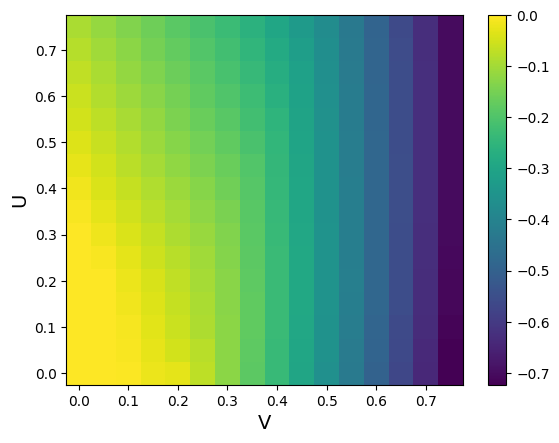

In [38]:
plt.pcolormesh(v1_mesh,u_mesh,sorted_ground_state_e[:,:,0])
plt.xlabel('V', size = '14')
plt.ylabel('U', size = '14')
plt.colorbar()

In [39]:
np.mean(final_iteration)

np.float64(123.9349609375)

In [40]:
np.max(final_iteration)

np.int32(500)

In [41]:
np.min(final_iteration)

np.int32(2)